# 오버워치 2 점수판 분석 AI

In [1]:
import os
import pandas as pd


def prepare_scoreboard(defeat_, draw_, victory_):
    scoreboard_ = pd.concat([defeat_, draw_, victory_])
    scoreboard_.set_index(pd.Index((i, j) for i in range(len(scoreboard_) // 10) for j in range(10)), inplace=True)
    return scoreboard_


datapath = os.path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
draw = pd.read_csv(datapath + 'draw.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboard = prepare_scoreboard(defeat, draw, victory)
scoreboard

E   A   D    DMG      H    MIT    GAME
0   0   7   3   6   5933   1068   6199  DEFEAT
    1   7   0  10   3601    747      0  DEFEAT
    2   9   1   6   4352      0      0  DEFEAT
    3   7   7   2   2332   6325      0  DEFEAT
    4   6   4   2   3410   5979    606  DEFEAT
...    ..  ..  ..    ...    ...    ...     ...
189 5  19   3  11  12775      0  24912  DEFEAT
    6  22   1  10  10100   1911      0  DEFEAT
    7  16   2  10  11887      0      0  DEFEAT
    8   5  12  11   2391   9817    154  DEFEAT
    9  12  13  10   3532  13911      0  DEFEAT

[1900 rows x 7 columns]

In [2]:
scoreboard.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1900 entries, (0, 0) to (189, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       1900 non-null   int64 
 1   A       1900 non-null   int64 
 2   D       1900 non-null   int64 
 3   DMG     1900 non-null   int64 
 4   H       1900 non-null   int64 
 5   MIT     1900 non-null   int64 
 6   GAME    1900 non-null   object
dtypes: int64(6), object(1)
memory usage: 115.4+ KB


In [3]:
scoreboard['GAME'].value_counts()

GAME
DEFEAT     925
VICTORY    925
DRAW        50
Name: count, dtype: int64

In [4]:
scoreboard.describe()

,E,A,D,DMG,H,MIT
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,14.241579,7.671053,6.516842,6439.960526,4007.999474,2387.648421
std,10.435845,8.890161,3.936734,4771.149086,5339.500654,4828.766910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,4.000000,2720.500000,0.000000,0.000000
50%,13.000000,4.000000,6.000000,5506.000000,847.000000,242.500000
75%,20.000000,12.000000,9.000000,9631.500000,7718.500000,1801.250000
max,56.000000,48.000000,21.000000,29354.000000,27756.000000,41092.000000


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = os.path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [6]:
tank = scoreboard[::10]
damage = pd.concat([scoreboard[1::10], scoreboard[2::10]])
support = pd.concat([scoreboard[3::10], scoreboard[4::10]])

그림 저장: tank_hist


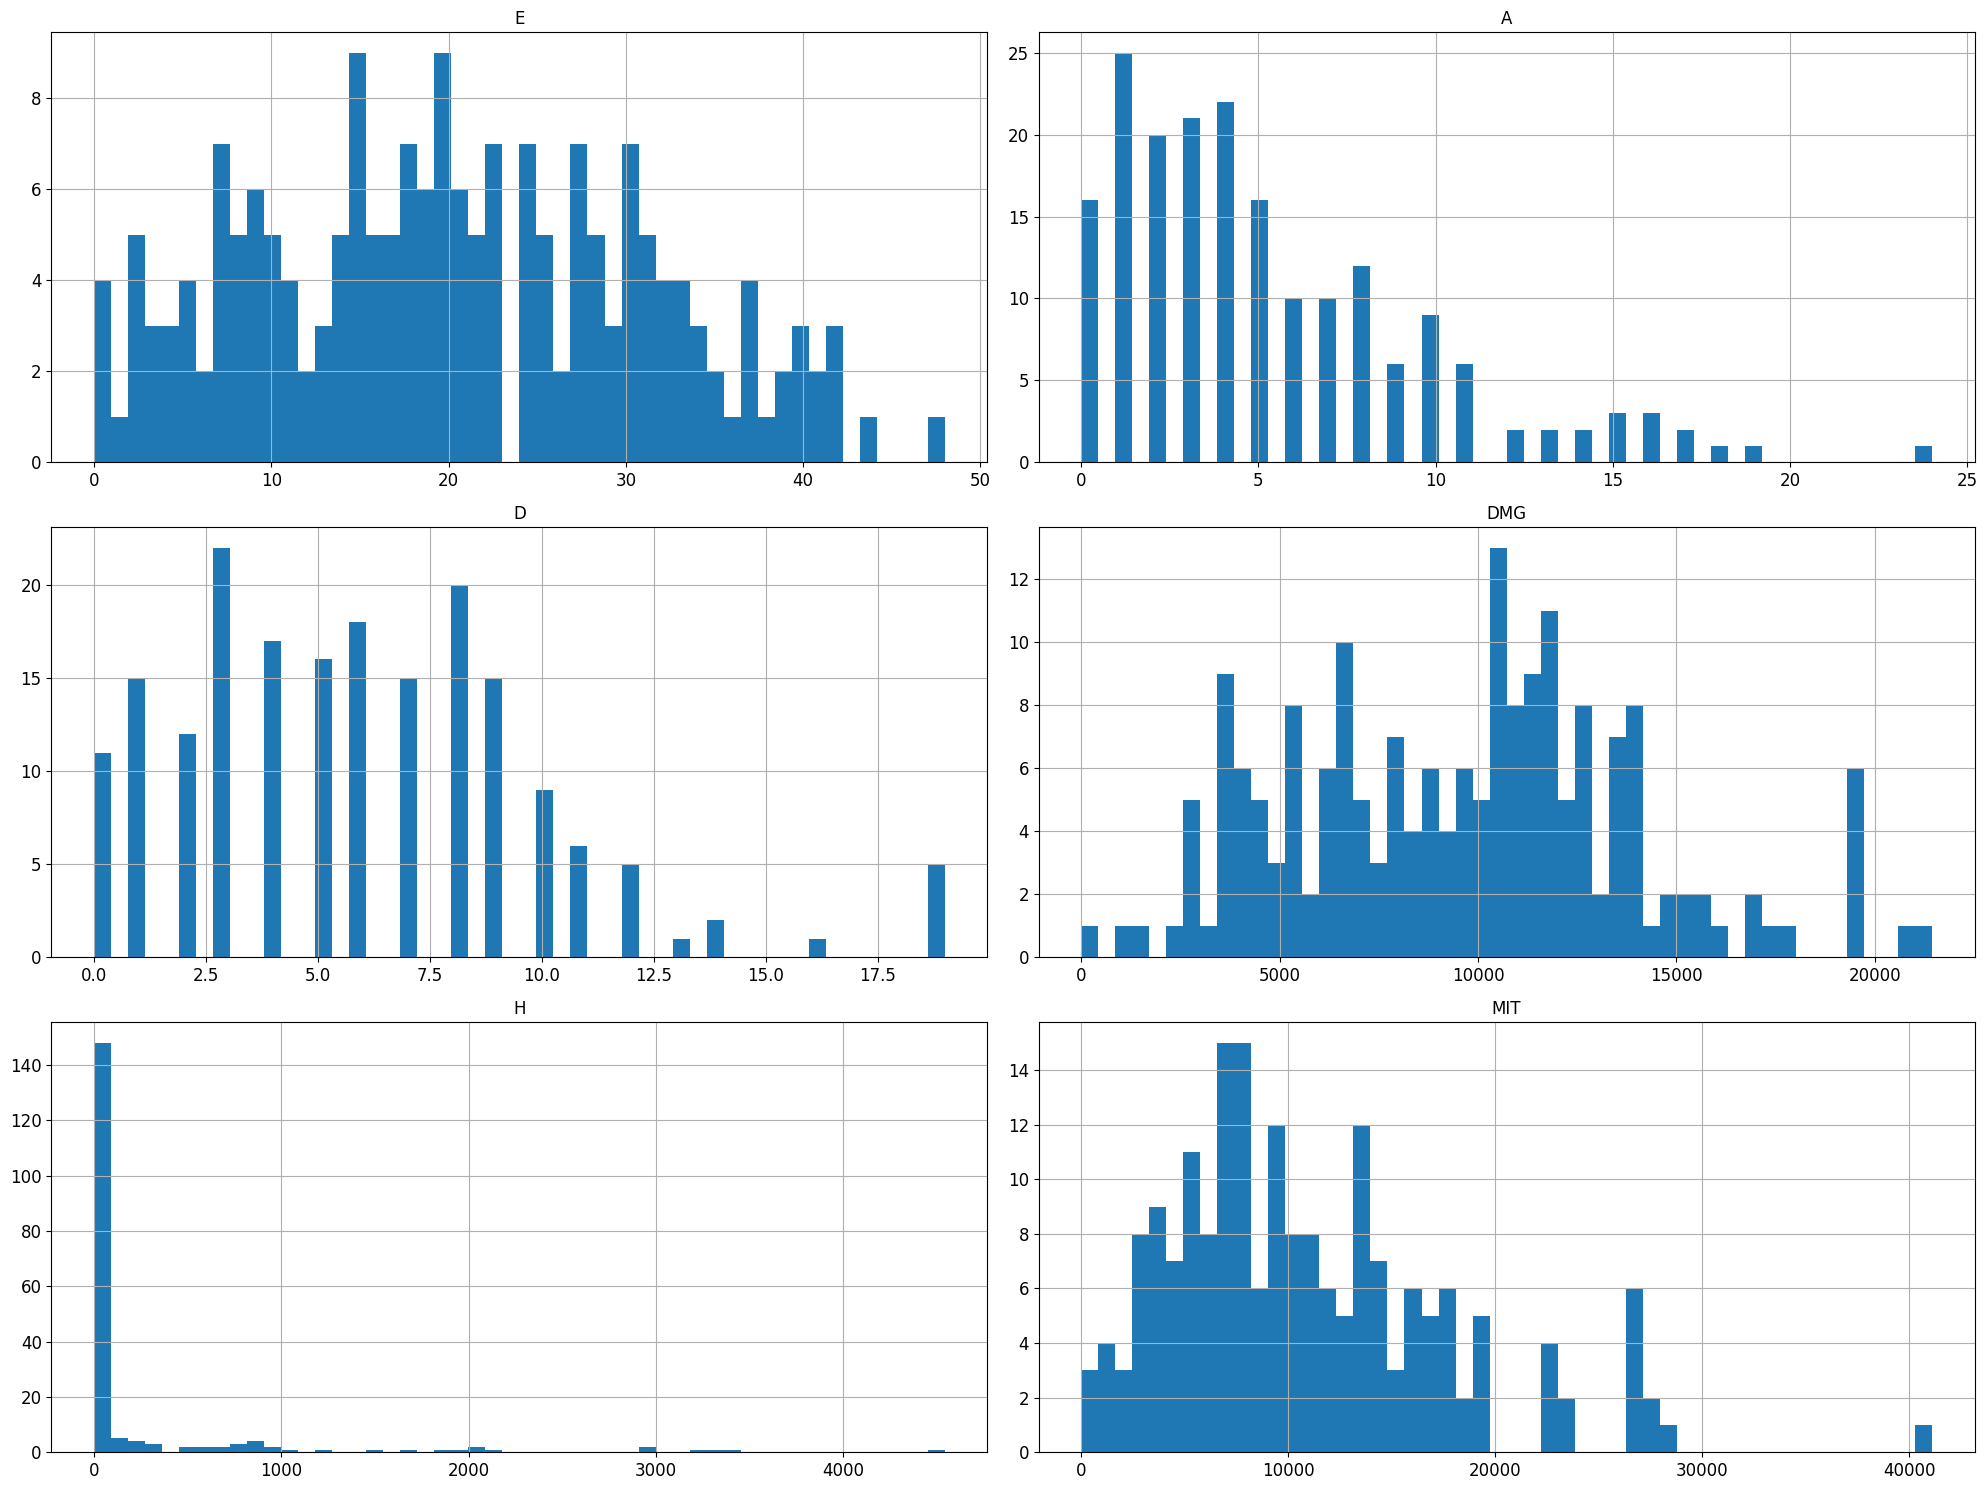

In [7]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장: damage_hist


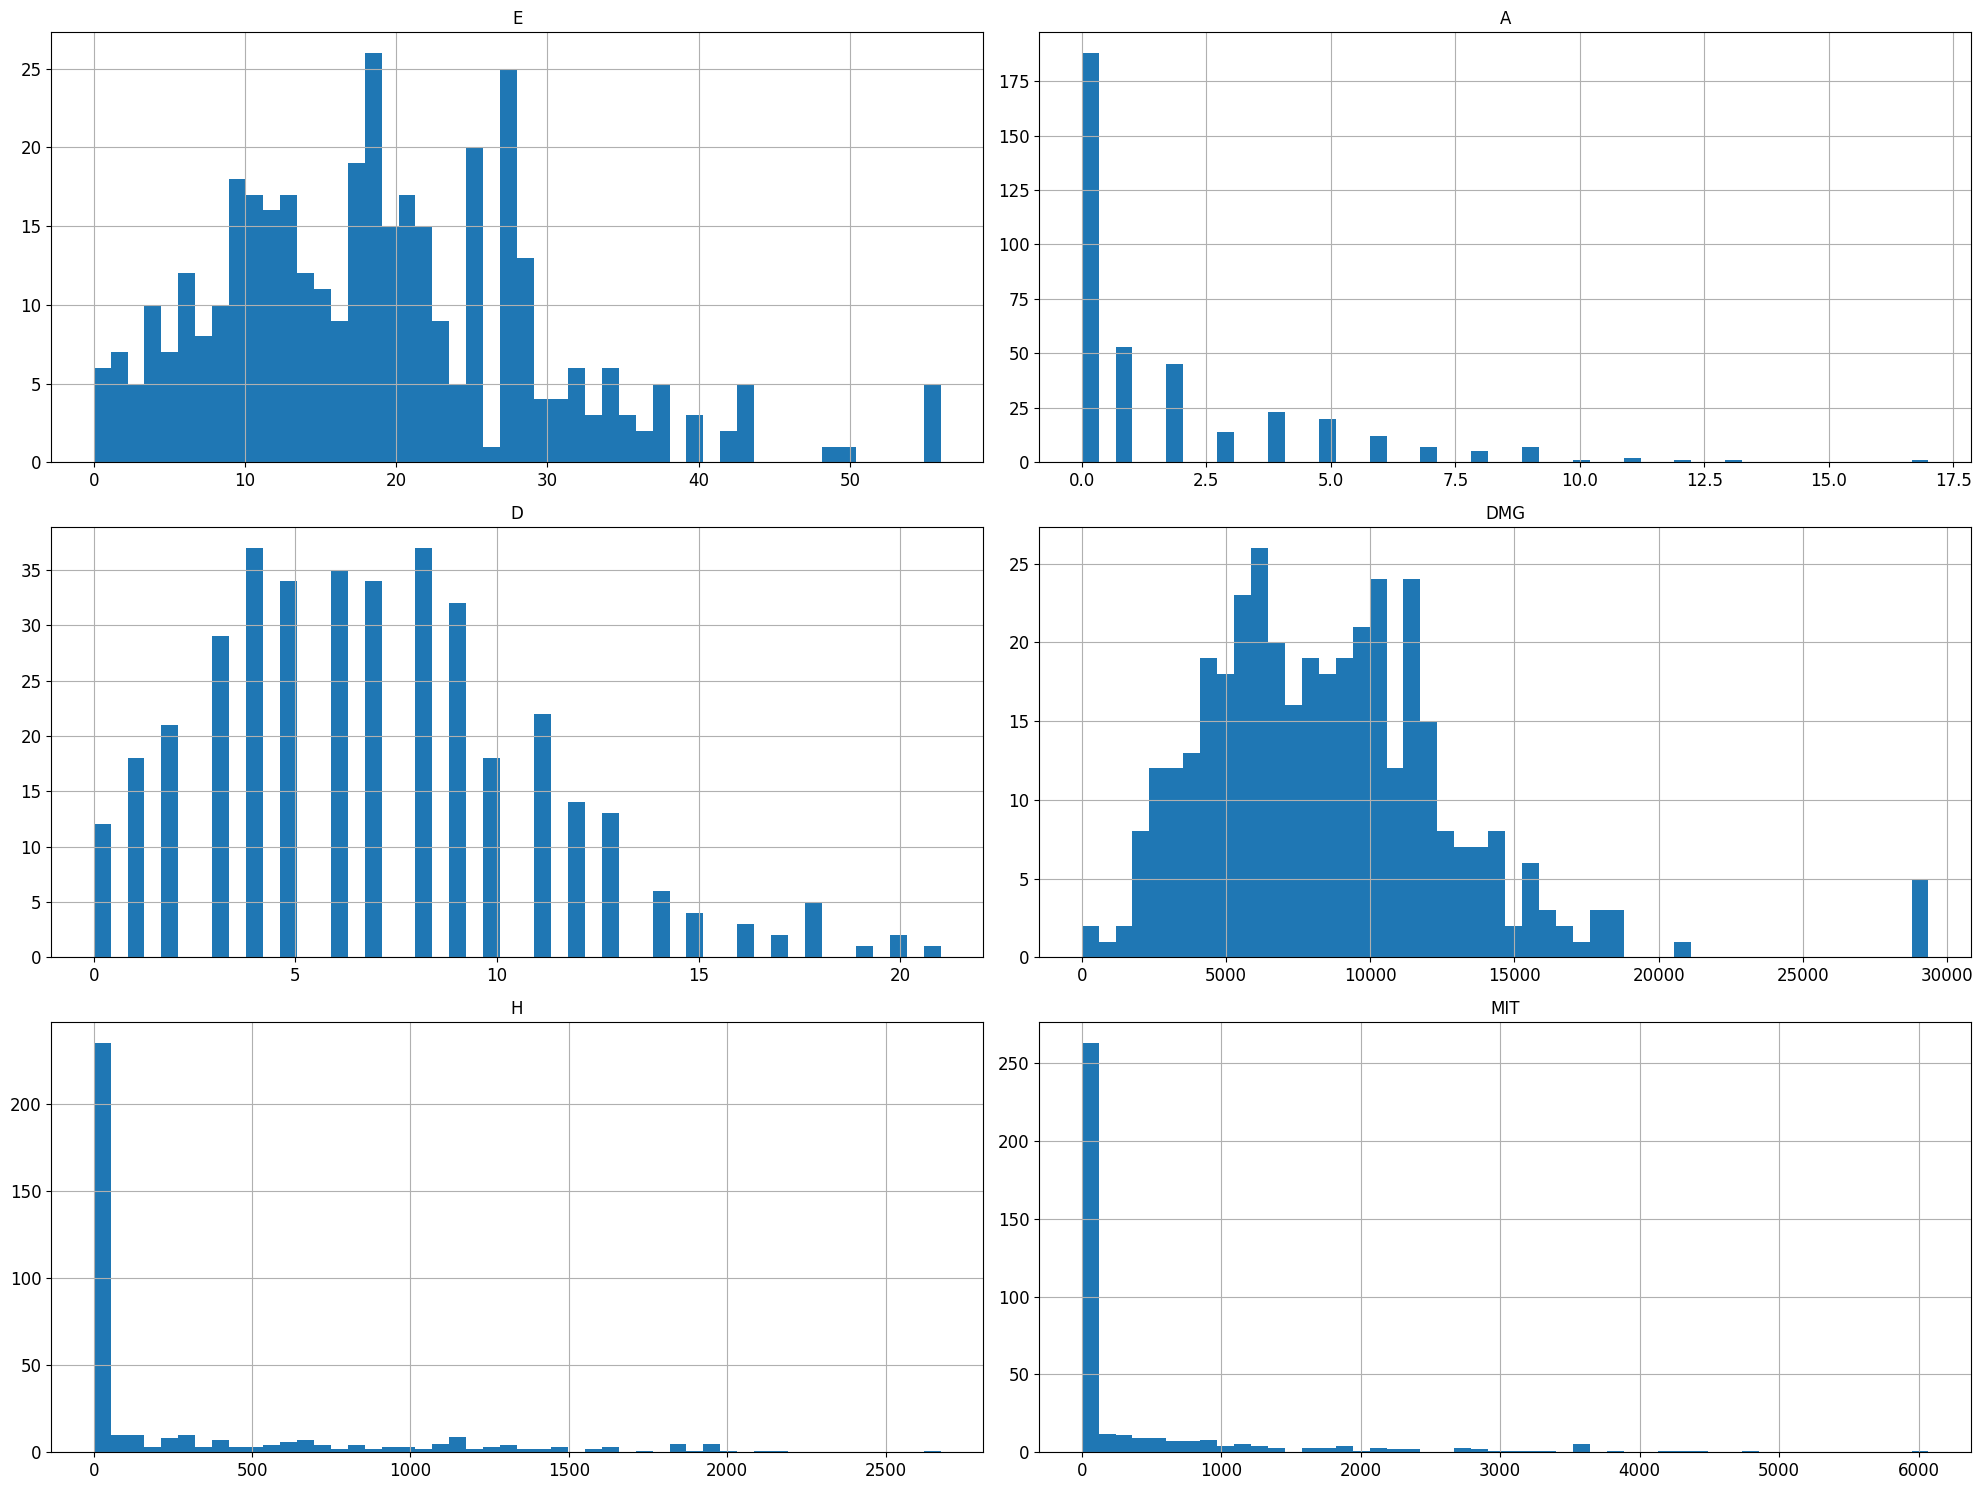

In [8]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장: support_hist


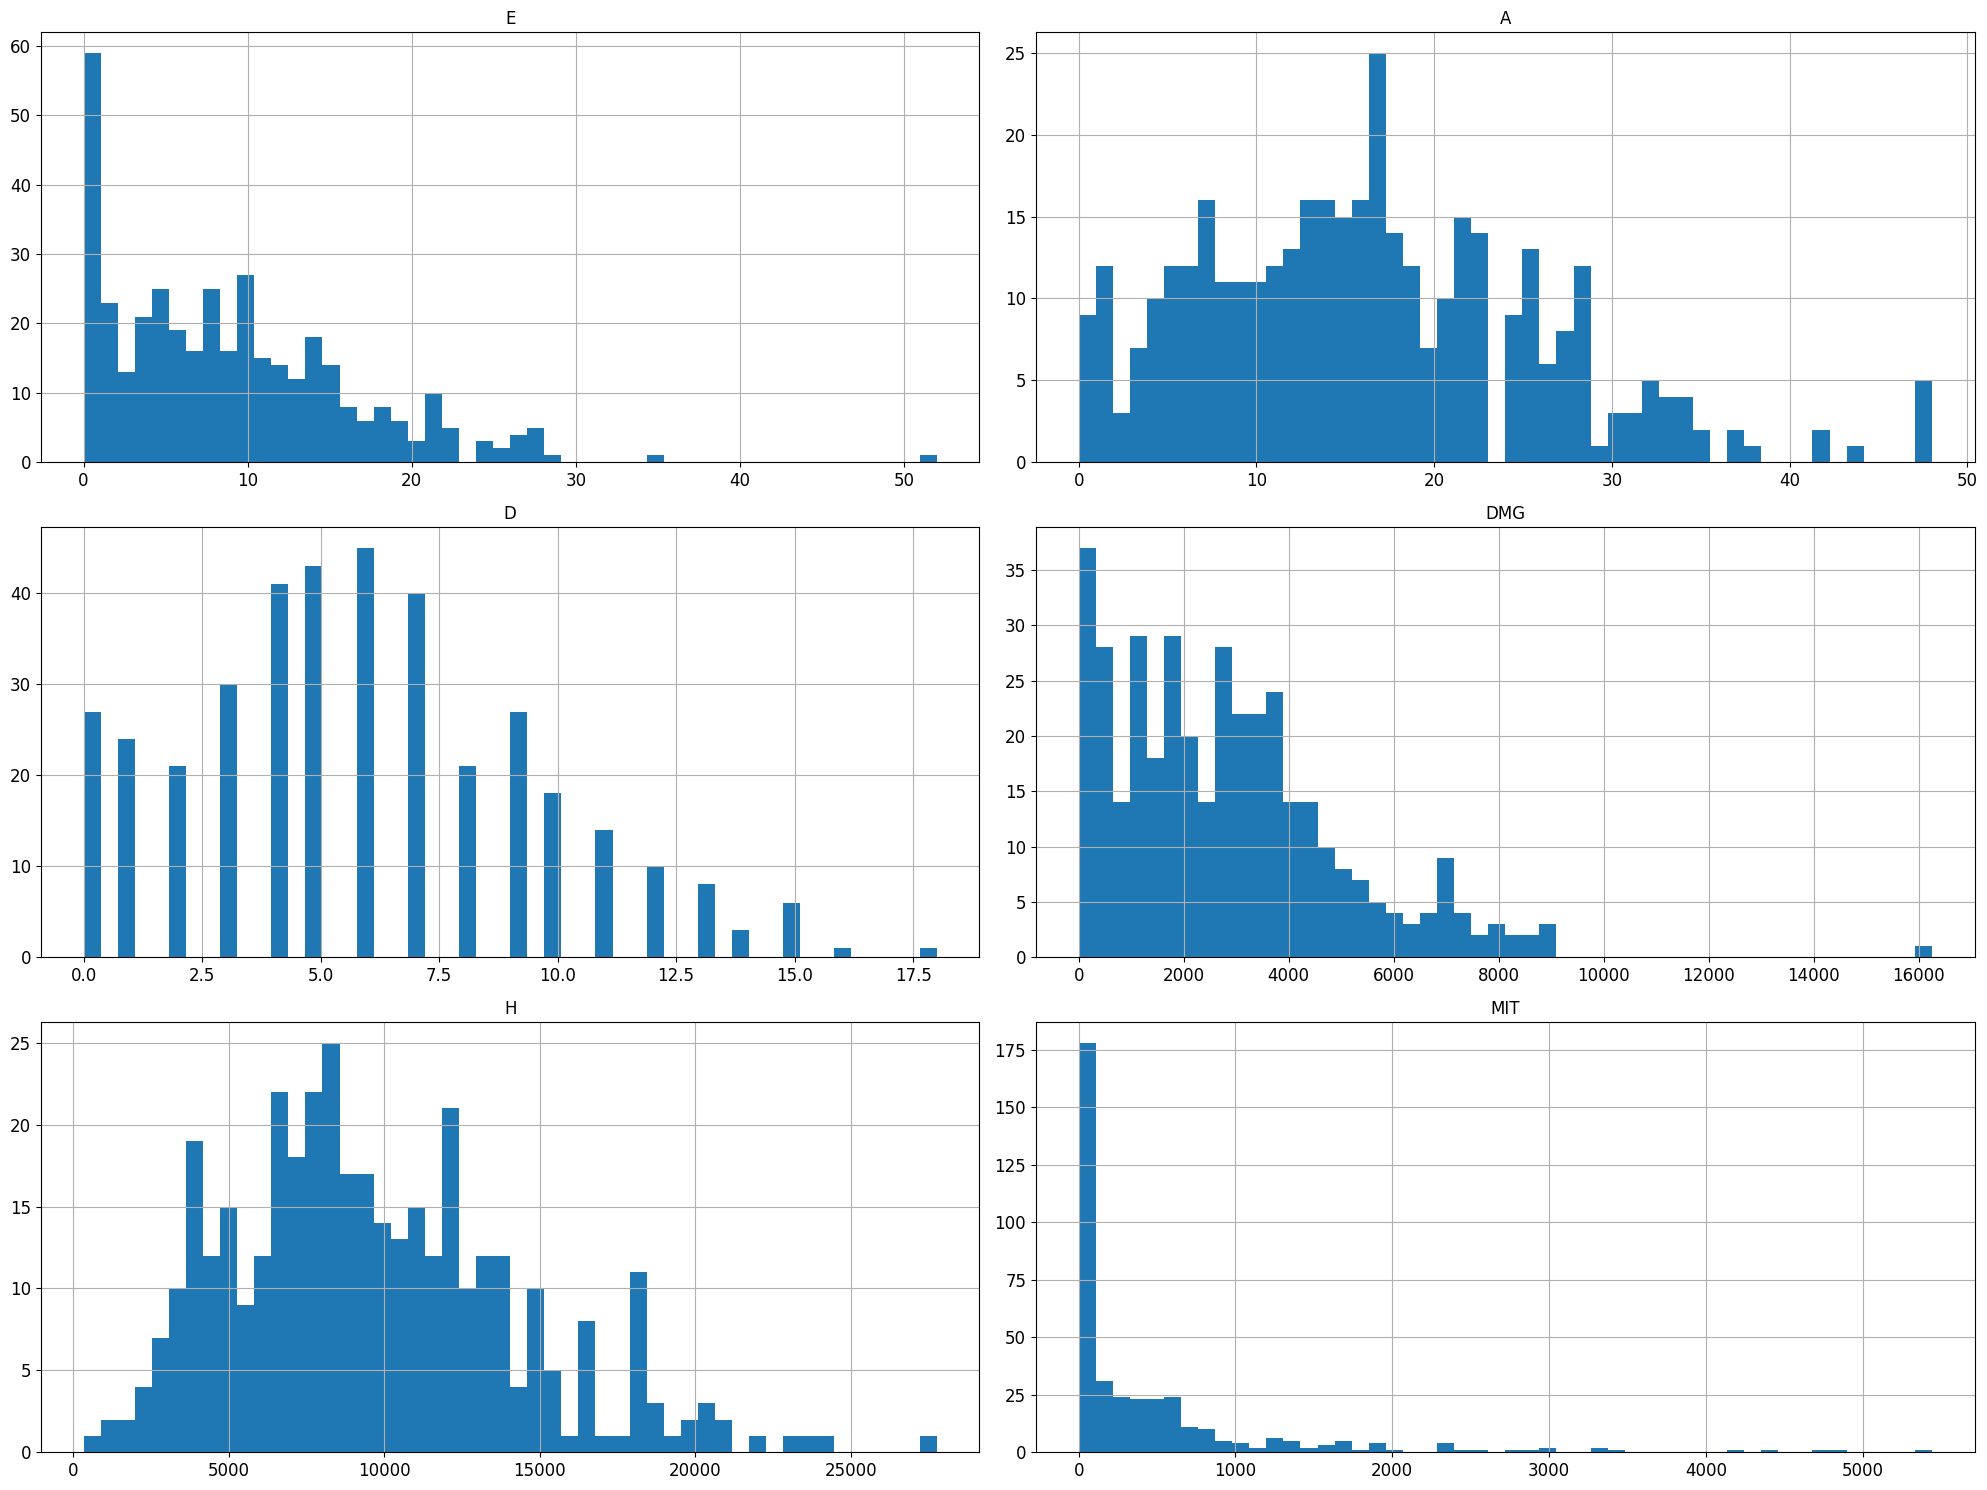

In [9]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [10]:
import numpy as np

train_set = scoreboard.loc[np.random.default_rng().permutation(len(scoreboard) // 10)]

In [11]:
scoreboard = train_set.copy()
e = scoreboard['E'].copy()
d = scoreboard['D'].copy()
e[e == 0] = .5
d[d == 0] = .5
scoreboard['E_per_D'] = e / d
scoreboard.describe()

,E,A,D,DMG,H,MIT,E_per_D
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,14.241579,7.671053,6.516842,6439.960526,4007.999474,2387.648421,3.537868
std,10.435845,8.890161,3.936734,4771.149086,5339.500654,4828.766910,5.118929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455
25%,6.000000,1.000000,4.000000,2720.500000,0.000000,0.000000,1.000000
50%,13.000000,4.000000,6.000000,5506.000000,847.000000,242.500000,2.000000
75%,20.000000,12.000000,9.000000,9631.500000,7718.500000,1801.250000,3.750000
max,56.000000,48.000000,21.000000,29354.000000,27756.000000,41092.000000,46.000000


In [12]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
scoreboard_cat = train_set[['GAME']]
scoreboard_cat_encoded = ordinal_encoder.fit_transform(scoreboard_cat)
scoreboard_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [13]:
ordinal_encoder.categories_

[array(['DEFEAT', 'DRAW', 'VICTORY'], dtype=object)]

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

scoreboard_num = train_set.drop('GAME', axis=1)
e_ix, d_ix = [scoreboard_num.columns.get_loc(c) for c in ('E', 'D')]


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.to_numpy(np.float64)
        e = X[:, e_ix]
        d = X[:, d_ix]
        e[e == 0] = 0.5
        d[d == 0] = 0.5
        e_per_d = e / d
        return np.c_[X, e_per_d]


attr_adder = CombinedAttributesAdder()
scoreboard_extra_attribs = attr_adder.transform(scoreboard_num)
scoreboard_extra_attribs = pd.DataFrame(
    scoreboard_extra_attribs, scoreboard_num.index, list(scoreboard_num) + ['E_per_D']
)
scoreboard_extra_attribs

E     A     D      DMG        H      MIT   E_per_D
46  0  24.0   4.0   9.0  14908.0      0.0  10602.0  2.666667
    1  17.0   0.0   5.0   9799.0      0.0      0.0  3.400000
    2  21.0   2.0  13.0  11357.0   1365.0      0.0  1.615385
    3  10.0  14.0   8.0   2911.0   9618.0    404.0  1.250000
    4  14.0  19.0   9.0   4820.0  10536.0      0.0  1.555556
...     ...   ...   ...      ...      ...      ...       ...
151 5  21.0   6.0   8.0  10968.0      0.0  12037.0  2.625000
    6  18.0   1.0  10.0   7163.0    938.0      0.0  1.800000
    7  19.0   3.0   8.0   9540.0    533.0      0.0  2.375000
    8  13.0  11.0  10.0   3485.0  10084.0    536.0  1.300000
    9   7.0  13.0  10.0   2523.0  11515.0      0.0  0.700000

[1900 rows x 7 columns]

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('attribs_adder', CombinedAttributesAdder()), ('std_scaler', StandardScaler())])
scoreboard_num_tr = num_pipeline.fit_transform(scoreboard_num)
scoreboard_num_tr

array([[ 0.93597852, -0.41304302,  0.63099776, ..., -0.7508295 ,
         1.70157605, -0.17023691],
       [ 0.26277655, -0.86309705, -0.39490511, ..., -0.7508295 ,
        -0.49459356, -0.02694007],
       [ 0.64746339, -0.63807003,  1.65690063, ..., -0.49512032,
        -0.49459356, -0.37566244],
       ...,
       [ 0.45511997, -0.52555653,  0.37452204, ..., -0.65098116,
        -0.49459356, -0.22722997],
       [-0.1219103 ,  0.37455155,  0.88747348, ...,  1.1382338 ,
        -0.38356291, -0.4372901 ],
       [-0.69894056,  0.59957857,  0.88747348, ...,  1.40630694,
        -0.49459356, -0.55453297]])

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

full_pipeline = ColumnTransformer(
    [('num', num_pipeline, scoreboard_num.columns), ('cat', OrdinalEncoder(), scoreboard_cat.columns)]
)
scoreboard_prepared = full_pipeline.fit_transform(train_set)
X = scoreboard_prepared[:, :-1].reshape(-1, 70)
y = scoreboard_prepared[::10, -1]

In [17]:
X

array([[ 0.93597852, -0.41304302,  0.63099776, ...,  2.80324715,
        -0.43679962, -0.56104646],
       [ 2.09003905, -0.63807003,  1.14394919, ...,  2.26260487,
        -0.32804759, -0.45683058],
       [ 2.37855418,  0.37455155, -0.90785655, ...,  1.93046393,
        -0.49459356, -0.5827581 ],
       ...,
       [ 0.26277655, -0.30052951,  0.37452204, ...,  1.08278331,
        -0.49459356,  0.92077311],
       [ 1.80152392, -0.41304302, -0.65138083, ...,  0.95108839,
        -0.49459356, -0.62618139],
       [ 0.7436351 , -0.30052951, -0.13842939, ...,  1.40630694,
        -0.49459356, -0.55453297]])

In [18]:
X.shape

(190, 70)

In [19]:
y

array([0., 0., 2., 0., 2., 0., 2., 0., 2., 2., 2., 0., 2., 2., 0., 0., 2.,
       0., 0., 0., 2., 2., 0., 0., 2., 2., 0., 2., 2., 0., 2., 2., 0., 0.,
       2., 2., 2., 0., 0., 2., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2.,
       0., 0., 2., 0., 0., 2., 0., 2., 0., 2., 1., 2., 2., 0., 2., 2., 2.,
       2., 0., 2., 0., 0., 0., 0., 0., 0., 2., 2., 2., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 2., 0., 2., 1., 2., 2., 2., 2., 0., 0., 2., 0., 0.,
       0., 2., 2., 0., 0., 2., 2., 2., 0., 0., 2., 2., 2., 0., 0., 0., 2.,
       1., 2., 2., 0., 2., 2., 0., 0., 0., 0., 2., 1., 0., 2., 0., 0., 0.,
       0., 0., 2., 2., 2., 2., 0., 0., 0., 2., 2., 2., 0., 0., 2., 0., 0.,
       2., 0., 2., 2., 0., 0., 2., 2., 0., 2., 1., 0., 2., 0., 0., 0., 2.,
       0., 2., 0., 0., 2., 0., 2., 0., 0., 2., 0., 0., 2., 2., 0., 2., 0.,
       0., 2., 2.])

In [20]:
y.shape

(190,)

In [21]:
from sklearn import ensemble, linear_model, neighbors, svm, tree
from sklearn.model_selection import cross_val_score

models = {
    'AdaBoostClassifier': ensemble.AdaBoostClassifier(),
    'BaggingClassifier': ensemble.BaggingClassifier(n_jobs=-1),
    'ExtraTreesClassifier': ensemble.ExtraTreesClassifier(n_jobs=-1),
    'GradientBoostingClassifier': ensemble.GradientBoostingClassifier(),
    'RandomForestClassifier': ensemble.RandomForestClassifier(n_jobs=-1),
    'HistGradientBoostingClassifier': ensemble.HistGradientBoostingClassifier(),
    'LogisticRegression': linear_model.LogisticRegression(max_iter=300, n_jobs=-1),
    'PassiveAggressiveClassifier': linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    'Perceptron': linear_model.Perceptron(n_jobs=-1),
    'RidgeClassifier': linear_model.RidgeClassifier(),
    'SGDClassifier': linear_model.SGDClassifier(n_jobs=-1),
    'KNeighborsClassifier': neighbors.KNeighborsClassifier(n_jobs=-1),
    'RadiusNeighborsClassifier': neighbors.RadiusNeighborsClassifier(8., n_jobs=-1),
    'NearestCentroid': neighbors.NearestCentroid(),
    'LinearSVC': svm.LinearSVC(dual='auto', max_iter=2000),
    'NuSVC': svm.NuSVC(nu=.09),
    'SVC': svm.SVC(),
    'DecisionTreeClassifier': tree.DecisionTreeClassifier(),
    'ExtraTreeClassifier': tree.ExtraTreeClassifier()
}
scores = {}
for k, v in models.items():
    scores[k] = cross_val_score(v, X, y, n_jobs=-1).mean()
sorted_ = sorted(scores.items(), key=lambda item: item[1], reverse=True)
sorted_

[('LogisticRegression', 0.8947368421052632),
 ('RandomForestClassifier', 0.8894736842105264),
 ('Perceptron', 0.8894736842105264),
 ('PassiveAggressiveClassifier', 0.8842105263157896),
 ('SVC', 0.8842105263157896),
 ('ExtraTreesClassifier', 0.8789473684210527),
 ('LinearSVC', 0.8736842105263157),
 ('BaggingClassifier', 0.8684210526315791),
 ('GradientBoostingClassifier', 0.868421052631579),
 ('SGDClassifier', 0.8631578947368421),
 ('AdaBoostClassifier', 0.8578947368421053),
 ('NuSVC', 0.8578947368421053),
 ('RidgeClassifier', 0.8526315789473683),
 ('KNeighborsClassifier', 0.8526315789473683),
 ('NearestCentroid', 0.8526315789473683),
 ('HistGradientBoostingClassifier', 0.8421052631578947),
 ('DecisionTreeClassifier', 0.8210526315789475),
 ('RadiusNeighborsClassifier', 0.7947368421052632),
 ('ExtraTreeClassifier', 0.7842105263157894)]

In [22]:
from sklearn.model_selection import cross_val_predict

transform = full_pipeline.named_transformers_.cat.inverse_transform
model = models[sorted_[0][0]]
for i, (y_true, y_pred) in enumerate(
        zip(transform(y.reshape(-1, 1)), transform(cross_val_predict(model, X, y, n_jobs=-1).reshape(-1, 1)))
):
    y_true, y_pred = y_true[0], y_pred[0]
    if y_true != y_pred:
        i = scoreboard.iloc[i * 10].name[0]
        defeats = len(defeat) // 10
        total = defeats + len(draw) // 10
        next_ = i + 1
        if i < defeats:
            print(f'{y_true} ({next_}) -> {y_pred} ({i})')
        elif i < total:
            print(f'{y_true} ({next_ - defeats}) -> {y_pred} ({i})')
        else:
            print(f'{y_true} ({next_ - total}) -> {y_pred} ({i})')
        print(scoreboard.loc[i], end='\n\n')

VICTORY (64) -> DEFEAT (166)
   E  A  D   DMG     H   MIT     GAME  E_per_D
0  6  1  1  4935     0  1896  VICTORY     6.00
1  4  0  1  2540     0     0  VICTORY     4.00
2  5  0  4  2127     0  1440  VICTORY     1.25
3  0  2  1   225  2644    58  VICTORY     0.50
4  0  4  2     0  3927     0  VICTORY     0.25
5  6  3  1  3472     0  1285   DEFEAT     6.00
6  7  0  2  3210     0     0   DEFEAT     3.50
7  0  0  0     0     0     0   DEFEAT     1.00
8  1  3  2   356  2152    64   DEFEAT     0.50
9  3  5  0  1283  2749   249   DEFEAT     6.00

VICTORY (77) -> DEFEAT (179)
    E   A   D    DMG      H    MIT     GAME   E_per_D
0  21   4   7  16875      0  22715  VICTORY  3.000000
1  20   0   7  10075      0      0  VICTORY  2.857143
2  19   5   9  12561      0    362  VICTORY  2.111111
3  10  17  10   3745  18067      0  VICTORY  1.000000
4   5  16  12   1853  14356   1779  VICTORY  0.416667
5  19   9   8  15859      0   8160   DEFEAT  2.375000
6  21   4   8  14408    402   1999   DEFEAT  2

In [32]:
for model, _ in sorted_:
    model = models[model].fit(X, y)
    if hasattr(model, 'feature_importances_'):
        print(model)
        importances = model.feature_importances_.reshape(-1, 7)
        
        tank = importances[[0, 5]]
        damage = importances[[1, 2, 6, 7]]
        support = importances[[3, 4, 8, 9]]
        
        feature = '돌격 1인', '공격 1인', '지원 1인'
        
        print('\n**역할 중요도**')
        sum_ = tank.sum(), damage.sum() / 2, support.sum() / 2
        for s, f in sorted(zip(sum_, feature), reverse=True):
            print(f'{f}: {s * 100:.2f}%')

        feature = '처치', '도움', '죽음', '피해', '치유', '경감', '목숨당 처치'
        
        print('\n**특성 중요도**')
        for s, f in sorted(zip(importances.sum(0), feature), reverse=True):
            print(f'{f}: {s * 100:.2f}%')
        
        print('\n**돌격 1인 특성 중요도**')
        for s, f in sorted(zip(tank.sum(0), feature), reverse=True):
            print(f'{f}: {s * 100:.2f}%')
        
        print('\n**공격 1인 특성 중요도**')
        for s, f in sorted(zip(damage.sum(0) / 2, feature), reverse=True):
            print(f'{f}: {s * 100:.2f}%')
        
        print('\n**지원 1인 특성 중요도**')
        for s, f in sorted(zip(support.sum(0) / 2, feature), reverse=True):
            print(f'{f}: {s * 100:.2f}%')
        
        break

RandomForestClassifier(n_jobs=-1)

**역할 중요도**
돌격 1인: 33.97%
공격 1인: 18.47%
지원 1인: 14.54%

**특성 중요도**
목숨당 처치: 51.70%
처치: 14.00%
도움: 8.65%
죽음: 8.12%
피해: 6.60%
치유: 6.17%
경감: 4.75%

**돌격 1인 특성 중요도**
목숨당 처치: 21.08%
처치: 4.53%
죽음: 3.02%
피해: 1.65%
도움: 1.55%
경감: 1.50%
치유: 0.62%

**공격 1인 특성 중요도**
목숨당 처치: 10.01%
처치: 3.23%
피해: 1.63%
치유: 1.26%
죽음: 1.22%
경감: 0.63%
도움: 0.50%

**지원 1인 특성 중요도**
목숨당 처치: 5.30%
도움: 3.05%
치유: 1.51%
처치: 1.50%
죽음: 1.33%
경감: 0.99%
피해: 0.84%
